In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    if isinstance(x, np.ndarray):
        for i, z in enumerate(x):
            if z > 0:
                x[i] = 1/(1 + np.exp(-z))
            else:
                x[i] = np.exp(z)/(1 + np.exp(z))
        return x
    else:
        if x > 0:
            return 1/(1 + np.exp(-x))
        else:
            return np.exp(x)/(1 + np.exp(x))

Check the monotonicity of function:

\begin{equation*}
      \pi \mapsto
      V_{y|x}^*
                :=  \mathbb{E}\left[ \sigma\Bigl( -2\|{\boldsymbol\mu}\|_2( \|{\boldsymbol\mu}\|_2 + G )
                - \log\frac{\pi}{1-\pi} Y \Bigr)^2 \right].
\end{equation*}

In [3]:
def get_vyx(PI_list, mu):
    res = np.zeros(len(PI_list))
    for idx, pi in enumerate(PI_list):
        intercept = np.log(pi/(1-pi))
        tmp1 = norm.expect(lambda G: sigmoid(-2*mu*(mu + G) - intercept)**2)
        tmp2 = norm.expect(lambda G: sigmoid(-2*mu*(mu + G) + intercept)**2)
        res[idx] = pi*tmp1 + (1-pi)*tmp2
    return res

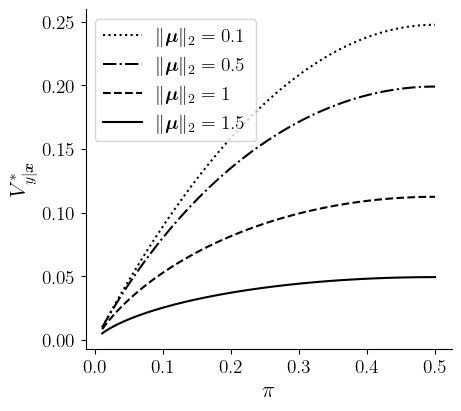

In [4]:
PI_list = np.concatenate((np.linspace(0.01, 0.1, 50) ,np.linspace(0.1, 0.5, 50)))
line_styles = [':', '-.', '--', '-']
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4), dpi=100, constrained_layout=True)
ax.set_xlabel(r'$x$', fontsize=16)
for idx, mu in enumerate([0.1, 0.5, 1, 1.5]):
    ax.plot(PI_list, get_vyx(PI_list, mu), label=rf'$\|\boldsymbol{{\mu}}\|_2 = {mu}$', linestyle=line_styles[idx], color='k')
ax.legend(fontsize=14)
ax.set_xlabel(r'$\pi$', fontsize=16)
ax.set_ylabel(r'$V_{y|\boldsymbol x}^*$', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('Vyx_plot.pdf')

Check the Monotonicity of functions:

\begin{align*}
                h_1(t) & := \mathbb{E}\left[ \Bigl( \sigma\bigl( 2 t (G+t) + c \bigr) - \sigma( G+t ) \Bigr)^2 \right],
                \\
                h_2(t) & := \mathbb{E}\left[ \Bigl( \sigma\bigl( 2 t (G-t) + c \bigr) - \sigma( G-t ) \Bigr)^2 \right],
                \\
                h(t) & := \pi h_1(t) + (1 - \pi) h_2(t),
                \qquad c = \log\frac{\pi}{1 - \pi}.
\end{align*}

In [5]:
def get_h(x_list, pi):
    res = np.zeros(len(x_list))
    for idx, x in enumerate(x_list):
        intercept = np.log(pi/(1-pi))
        tmp1 = norm.expect(lambda G: (sigmoid(2*x*(+x + G) + intercept) - sigmoid(+x + G))**2)
        tmp2 = norm.expect(lambda G: (sigmoid(2*x*(-x + G) + intercept) - sigmoid(-x + G))**2)
        res[idx] = pi*tmp1 + (1-pi)*tmp2
    return res

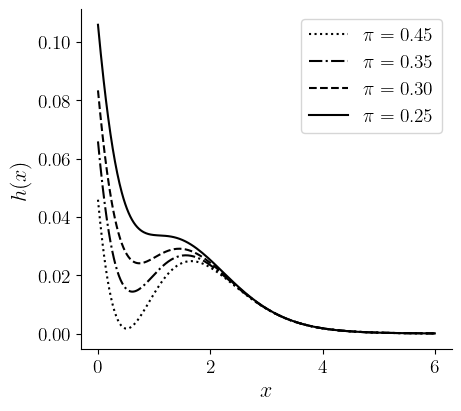

In [6]:
x_list = np.concatenate((np.linspace(0, 1, 100), np.linspace(1, 6, 100)))
line_styles = [':', '-.', '--', '-']
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4), dpi=100, constrained_layout=True)
ax.set_xlabel(r'$x$', fontsize=16)
for idx, pi in enumerate([0.45, 0.35, 0.3, 0.25]):
    ax.plot(x_list, get_h(x_list, pi), label=rf'$\pi = {pi:.2f}$', linestyle=line_styles[idx], color='k')
ax.legend(fontsize=14)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$h(x)$', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('h_plot_1.pdf')

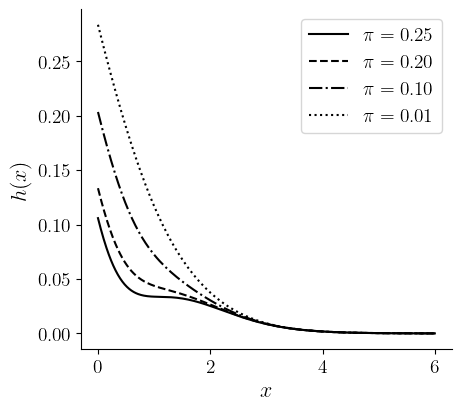

In [7]:
x_list = np.concatenate((np.linspace(0, 1, 100), np.linspace(1, 6, 100)))
line_styles = ['-', '--', '-.', ':']
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 4), dpi=100, constrained_layout=True)
ax.set_xlabel(r'$x$', fontsize=16)
for idx, pi in enumerate([0.25, 0.2, 0.1, 0.01]):
    ax.plot(x_list, get_h(x_list, pi), label=rf'$\pi = {pi:.2f}$', linestyle=line_styles[idx], color='k')
ax.legend(fontsize=14)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$h(x)$', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('h_plot_2.pdf')